In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show

In [4]:
data = pd.read_csv('C:\\Temp\\MRes\\training_data\\AB_6cat_slim.csv')

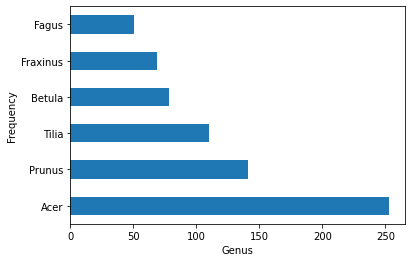

In [10]:
ax = data['GENUS'].value_counts().plot(kind='barh')
ax.set_xlabel("Genus")
ax.set_ylabel("Frequency")

plt.savefig('C:\\Temp\\MRes\\Figures\\class_frequency.eps', bbox_inches='tight')
plt.show()